In [ ]:
#Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv("wheat.csv")
df

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [ ]:
df.head()    #Displaying first 5 elements

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [ ]:
df.tail()     #Displaying last 5 elements

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3.0


In [ ]:
df.describe()     #describing the aggregate functions.

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
df.size    #rows*columns

1680

In [ ]:
df.shape   #no of rows amd columns

(210, 8)

In [ ]:
df.ndim     #Displaying the number of dimensions

2

In [ ]:
df.columns    #displaying the names of columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry coefficient', 'groove length', 'category'],
      dtype='object')

In [ ]:
df.isna().sum()     #counting the number of null values

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry coefficient    0
groove length            0
category                 0
dtype: int64

In [ ]:
#Preprocessing

In [ ]:
df.info()     #describing datatypes of all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


In [ ]:
#NORMALIZATION

In [ ]:
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()

#create an object to transform the data to fit minmax processor
x_scaled = min_max_scalar.fit_transform(df[["category"]].values.astype(float))

#Run the normalizer on the datafreame
df_mormalized = pd.DataFrame(x_scaled)
df['normalized2'] = x_scaled
df.sort_values(by='category')
df[['category','normalized2']]

,category,normalized2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
205,3.0,1.0
206,3.0,1.0
207,3.0,1.0
208,3.0,1.0


In [ ]:
from scipy import stats
df['zscore']=stats.zscore(df['category'])
df.sort_values(by='zscore')
df[['zscore','category']]

,zscore,category
0,-1.224745,1.0
1,-1.224745,1.0
2,-1.224745,1.0
3,-1.224745,1.0
4,-1.224745,1.0
...,...,...
205,1.224745,3.0
206,1.224745,3.0
207,1.224745,3.0
208,1.224745,3.0


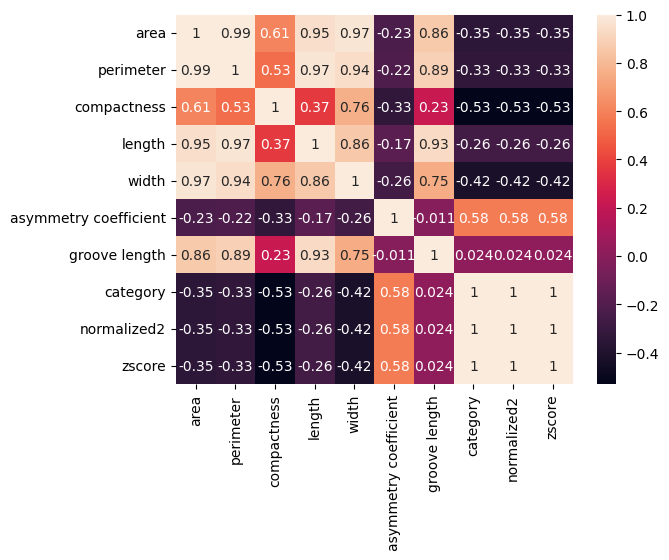

In [ ]:
#Correlation analysis
sns.heatmap(df.corr(method="pearson"),annot=True)
plt.show()
plt.savefig("heatmap_pearson.png")
plt.clf()
plt.close()

In [ ]:
df.drop(columns=['normalized2','zscore'],axis='columns', inplace=True)


KeyError: ignored

In [ ]:
#Classification algorithm
Y = df[['category']]
X = df.drop(columns=['category'])     #this will drop the column named category
X

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
Y

,category
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
205,3.0
206,3.0
207,3.0
208,3.0


In [ ]:
#naive bayes

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(157, 53, 157, 53)

In [ ]:
#Building the model
from sklearn.naive_bayes import GaussianNB


In [ ]:
naive=GaussianNB()

In [ ]:
naive_model=naive.fit(x_train,y_train)
naive_model
print('The model has ran successfully')

The model has ran successfully


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Predicting on test data
y_test

,category
30,1.0
172,3.0
84,2.0
199,3.0
60,1.0
155,3.0
45,1.0
182,3.0
9,1.0
196,3.0


In [ ]:
y_test['Predicted']=naive_model.predict(x_test)
y_test

,category,Predicted
30,1.0,1.0
172,3.0,3.0
84,2.0,2.0
199,3.0,1.0
60,1.0,3.0
155,3.0,3.0
45,1.0,1.0
182,3.0,3.0
9,1.0,2.0
196,3.0,3.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test['category'],y_test['Predicted']))

[[11  1  2]
 [ 1 17  0]
 [ 2  0 19]]


In [ ]:
accuracy = accuracy_score(y_test['category'],y_test['Predicted'])
accuracy = np.round(accuracy,2)

In [ ]:
print('The accuracy of model is:',accuracy)

The accuracy of model is: 0.89


In [ ]:
print(classification_report(y_test['category'],y_test['Predicted']))

              precision    recall  f1-score   support

         1.0       0.79      0.79      0.79        14
         2.0       0.94      0.94      0.94        18
         3.0       0.90      0.90      0.90        21

    accuracy                           0.89        53
   macro avg       0.88      0.88      0.88        53
weighted avg       0.89      0.89      0.89        53



In [ ]:
#Predicting on new data
d1=X.iloc[15]
d1

area                     14.5900
perimeter                14.2800
compactness               0.8993
length                    5.3510
width                     3.3330
asymmetry coefficient     4.1850
groove length             4.7810
Name: 15, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
unique_labels = sorted(y_test['category'].unique())
for label in unique_labels:
    class_accuracy = accuracy_score(y_test[y_test['category'] == label]['category'], y_test[y_test['category'] == label]['Predicted'])
    print("Class {} Accuracy: {}".format(label, class_accuracy))

Class 1.0 Accuracy: 0.7857142857142857
Class 2.0 Accuracy: 0.9444444444444444
Class 3.0 Accuracy: 0.9047619047619048


In [ ]:
val_data = pd.DataFrame(d1)
val_data.transpose()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length
15,14.59,14.28,0.8993,5.351,3.333,4.185,4.781


In [ ]:
val_data1 = naive_model.predict(val_data.transpose())
val_data1

array([1.])

In [ ]:
#DECISION TREE

In [ ]:
df.head() #8th is the target

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [ ]:
X= df.iloc[ : , :-1] # features
features_cols = ['area','perimeter','compactness','length','width','assymetry cofficient','groove length']
Y = df.iloc[ :, 7].values #classlabel

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X= X.apply(LabelEncoder().fit_transform)

from sklearn.tree import DecisionTreeClassifier
reggessor = DecisionTreeClassifier(criterion = 'gini',max_depth = 5, splitter = 'best')
X
reggessor.fit(x_train,y_train) # training of classifier  # training model = reggressor

X_in = np.array([13.84,13.94,0.8955,5.324,3.379,2.259,4.805]) #here we have taken the 3rd dataset.
y_pred = reggessor.predict([X_in])
print("prediction :  ", y_pred)

prediction :   [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_test['Predicted_dt']=reggessor.predict(x_test)

In [ ]:
y_test

,category,Predicted,Predicted_dt
30,1.0,1.0,1.0
172,3.0,3.0,3.0
84,2.0,2.0,2.0
199,3.0,1.0,1.0
60,1.0,3.0,1.0
155,3.0,3.0,3.0
45,1.0,1.0,1.0
182,3.0,3.0,3.0
9,1.0,2.0,1.0
196,3.0,3.0,3.0


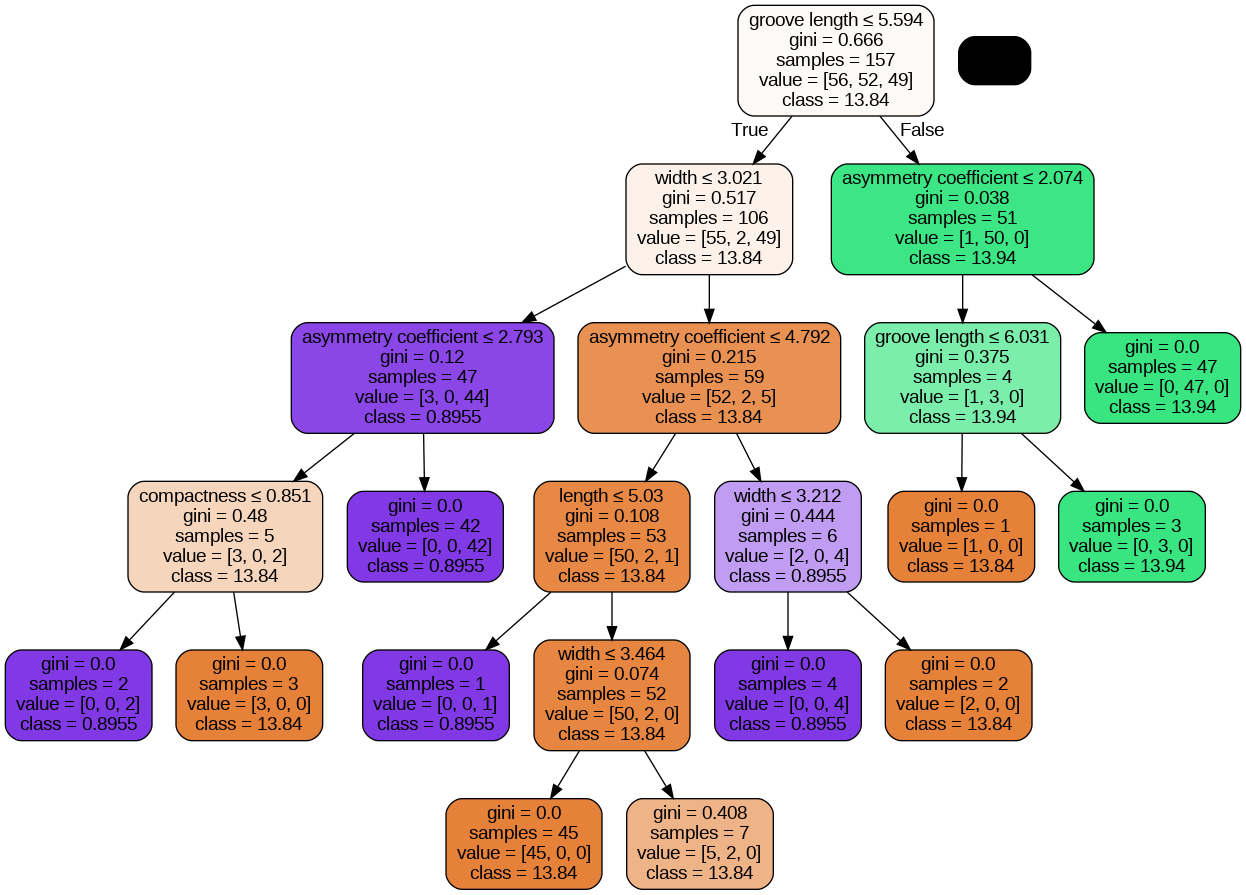

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_cols = ['area','perimeter','compactness','length','width','asymmetry coefficient','groove length']
export_graphviz(reggessor,out_file = dot_data , filled = True,rounded = True,special_characters = True, feature_names = feature_cols, class_names = ['13.84','13.94','0.8955','5.324','3.379','2.259','4.805'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())

In [ ]:
#CLUSTERING

In [ ]:
df_kmeans = pd.get_dummies(df,drop_first=True) #to remove redundant column
df_kmeans.head()


,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df_kmeans = scaler.fit_transform(df_kmeans)

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans) #fit_predict = gives the cluster no.
df_kmeans.insert(df_kmeans.columns.get_loc("length"),"Cluster",clusters)
df_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,area,perimeter,compactness,Cluster,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,0,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,0,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,0,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,0,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,0,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,1,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,1,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,1,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,1,5.175,2.836,3.598,5.044,3.0


In [ ]:
df_kmeans["Cluster"].value_counts() #gives data counts


1    75
0    74
2    61
Name: Cluster, dtype: int64

In [ ]:
df_kmeans.Cluster.unique()

array([0, 1, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

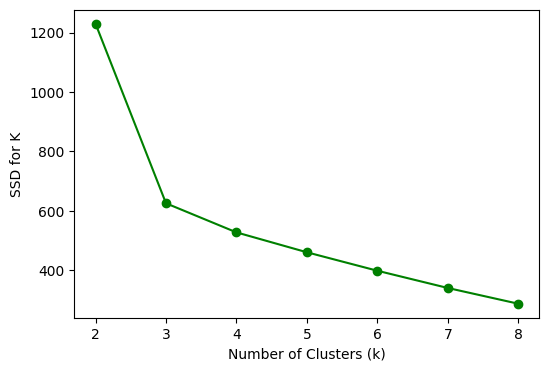

In [ ]:
ssd = []        #sum of squared distances(SSD)        #elbow graph
for k in range(2,9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6,4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSD for K")
plt.show()